# Pandas ve Numpy kütüphanelerini kullanarak Çoklu Doğrusal Regresyon modeli oluşturma

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("real_estate.csv")

In [3]:
data


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
data.corr()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [7]:
X = data[["X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores"]]
Y= data["Y house price of unit area"]

In [8]:
def featureNormalization(X):
    
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_scale = (X - mean)/std
    return X_scale
X = featureNormalization(X)
Y = featureNormalization(Y)



In [9]:
from sklearn.model_selection import train_test_split


x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33, random_state=0)

x_train = x_train.sort_index().values
y_train = y_train.sort_index().values
x_test = x_test.sort_index().values
y_test = y_test.sort_index().values



In [10]:
n = x_train.shape[1]
m=len(y_train)
k = len(x_test)



X_train = np.append(np.ones((m,1)),x_train,axis=1)

x_test = np.append(np.ones((k,1)),x_test,axis=1)
y_test = y_test.reshape(k,1)

Y_train = y_train.reshape(m,1)


theta=np.zeros((n+1,1))

In [11]:
X_train.shape, Y_train.shape, theta.shape

((277, 4), (277, 1), (4, 1))

In [12]:
def computeCost(x_train,y_train,theta): 
    
    m=len(y_train)
    
    hypothesis = x_train.dot(theta)  
    
    square_err = (hypothesis - y_train)**2
    
    return 1/(2*m)*np.sum(square_err)

In [13]:
computeCost(X_train,Y_train,theta)

0.5208051580271215

In [14]:
def gradientDescent(x,y,theta,alpha,num_iters):

    m=len(y)
    
    J=[]
    
    for i in range(num_iters):
        hypothesis = x.dot(theta)
        error = np.dot(x.transpose(),(hypothesis - y))
        descent = alpha * 1/m * error
        
        theta  -= descent
        
        J.append(computeCost(x,y,theta))
    
    return theta, J

In [15]:
theta, J = gradientDescent(X_train,Y_train,theta,0.01,1000)
theta

array([[ 0.03455355],
       [-0.21153487],
       [-0.52112436],
       [ 0.25869899]])

In [16]:
print("J(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1 + "+str(round(theta[2,0],2))+"x2 + "+str(round(theta[3,0],2))+"x3 + "+str(round(theta[4,0],2))+"x4 + "+ str(round(theta[5,0],2))+ "x5")

IndexError: index 4 is out of bounds for axis 0 with size 4

Text(0.5, 1.0, 'Cost function using Gradient Descent')

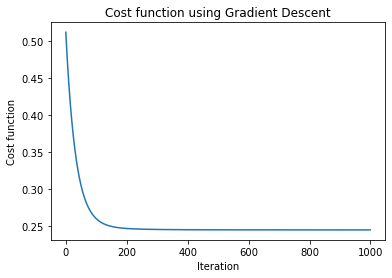

In [17]:
plt.plot(J)
plt.xlabel("Iteration")
plt.ylabel("Cost function")
plt.title("Cost function using Gradient Descent")

In [18]:
def predict(x_test,theta):
    
    y_pred = np.dot(x_test,theta)
    
    return y_pred

In [19]:
y_pred =predict(x_test,theta)

In [20]:
def r2score(y_test,y_pred):
    
    hkt = (y_test - y_pred)**2
    
    oft = (y_test - np.mean(y_test))**2
    
    r2 = 1-(np.sum(hkt)/np.sum(oft))
    return r2



In [21]:

print("r2 değeri: "+ str(round(r2score(y_test,y_pred),6)))

r2 değeri: 0.560911


In [22]:

"""import statsmodels.api as sm

model = sm.OLS(Y,X)

print(model.fit().summary())
"""

'import statsmodels.api as sm\n\nmodel = sm.OLS(Y,X)\n\nprint(model.fit().summary())\n'

Statsmodels modülü ile 

P-Value: Bu değer bize bağımsız değişkenden çıkan katsayının istatistiksel olarak anlamlı
    olup olmadığını vermektedir. Genel olarak kabul edilen anlamlılık değeri x<0.05'dir.
    Eğer bu değerin üzerinde bir sonuç çıkıyorsa ilgili bağımsız değişkenin modele etkisi anlamlı değildir.
    Bu değer, çok değişkenli regresyon analizinde değişkenlerin seçimi sırasında kullanılmaktadır.

In [23]:
def mSE(y_pred, y_test):
    
    return np.sum((y_pred- y_test)**2) / len(y_pred)


mSE(y_pred, y_test)

print("Mean Squared Error değeri: "+ str(round(mSE(y_pred, y_test),5)))

Mean Squared Error değeri: 0.40116


# Scikit-learn kütüphanelerini kullanarak Çoklu Doğrusal Regresyon modeli oluşturma

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data1 = pd.read_csv("real_estate.csv")
data1.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [25]:
X1 = data[["X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores"]]
Y1 = data["Y house price of unit area"]

In [26]:
from sklearn.model_selection import train_test_split

x_train1, x_test1,y_train1,y_test1 = train_test_split(X1,Y1,test_size=0.33, random_state=0)

X_train1 = x_train1.sort_index().values
Y_train1 = y_train1.sort_index().values
X_test1 = x_test1.sort_index().values
Y_test1 = y_test1.sort_index().values


Y_test1 = Y_test1.reshape(len(Y_test1),1)
Y_train1 = Y_train1.reshape(len(Y_train1),1)


from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.fit_transform(X_test1)
Y_train1 = sc.fit_transform(Y_train1)
Y_test1 = sc.fit_transform(Y_test1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()




lr.fit(X_train1,Y_train1)

y_pred1 = lr.predict(X_test1)


In [27]:
from sklearn.metrics import r2_score

print("R-squared: ", r2_score(Y_test1, y_pred1))

R-squared:  0.5680412231635391


In [28]:
def mSE(y_pred, y_test):
    
    return np.sum((y_pred- y_test)**2) / len(y_pred)



print("Mean Squared Error değeri: "+ str(round(mSE(y_pred1, Y_test1),5)))

Mean Squared Error değeri: 0.43196
